# 05. forecast  (시계열 분석)
## 1. 배경 및 설치

- 시계열 데이터 : 시간의 흐름에 대해 특정 패턴과 같은 정보를 가지고 있는 경우

- fbprophet
    - "https://facebook.github.io/prophet/
- 설치
    - 윈도우 유저는 Visual C++ Build Tool을 먼저 설치
        - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader (MAC M1)
    - conda install -c conda-forge fbprophet (Win or Mac)
    또는
    - pip install fbprophet

In [1]:
from pandas_datareader import data #설치확인
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## 잠깐!) 함수(def)의 기초

### [함수설명]
- 

In [2]:
#전역변수
a = 1
def func01(b,c):
    #지역변수
    global a
    a = 1
    return a+b+c
c = func01(2,3)
c    

6

- global 변수를 def 내에서 사요하고 있다면 global로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다.

$$ y = asin(2\pi ft + t_0)+b %%

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def plotSinWave(**kwargs): #keyword arguments
    """
    [Dostring] : plotSineWave...\n
    plot sine wave
    y = a sin(2 pi ft + t_0)+b
    """
    #기본값 설정
    endTime = kwargs.get("endTime",1)
    sampleTime = kwargs.get("sampleTime",0.01)
    amp = kwargs.get("amp",1)
    freq = kwargs.get("freq",1)
    startTime = kwargs.get("startTime",0)
    bias = kwargs.get("bias",0)
    figsize = kwargs.get("figsize",(12,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp*np.sin(2*np.pi * freq*time+startTime)+bias

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp)+"*sin(2*pi "+str(freq)+"*t"+str(startTime)+")+"+str(bias))
    plt.show()

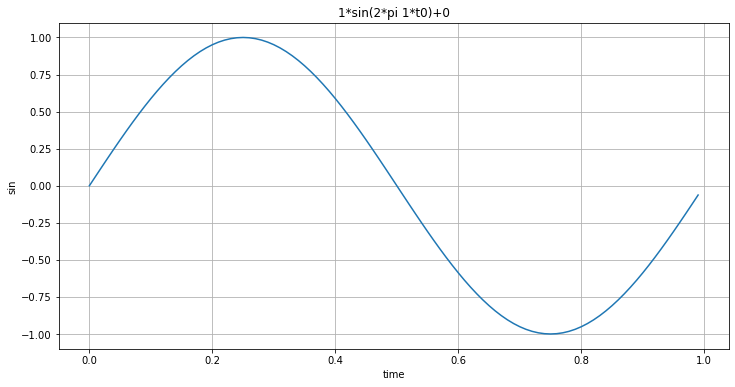

In [5]:
# plotSineWave(2,1,10,0.01,0.5,0)
# **kwargs 적고나서는
plotSinWave()

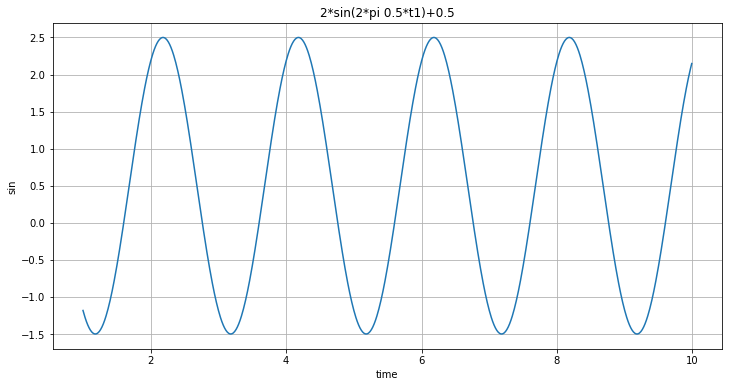

In [6]:
plotSinWave(amp=2,freq=0.5,startTime=1,endTime=10,bias=0.5)

---
## 093. 내가만든 함수를 import 하자
- drawSinWave.py로 모듈화 해보자

In [7]:
%%writefile ./drawSinWave.py
# 현재 경로(./)에 아래내용으로 파일만들기
import numpy as np
import matplotlib.pyplot as plt

def plotSinWave(**kwargs): #keyword arguments
    """
    [Dostring] : plotSineWave...\n
    plotsinwave
    y = a sin(2 pi ft + t_0)+b
    """
    #기본값 설정
    import matplotlib.pyplot as plt
    endTime = kwargs.get("endTime",1)
    sampleTime = kwargs.get("sampleTime",0.01)
    amp = kwargs.get("amp",1)
    freq = kwargs.get("freq",1)
    startTime = kwargs.get("startTime",0)
    bias = kwargs.get("bias",0)
    figsize = kwargs.get("figsize",(12,6))

    time = np.arange(startTime, endTime, sampleTime)
    result = amp*np.sin(2*np.pi * freq*time+startTime)+bias

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title("한글테스트"+str(amp)+"*sin(2*pi "+str(freq)+"*t"+str(startTime)+")+"+str(bias))
    plt.show()

if __name__ == "__main__":
    print("hello word!")
    print("this is test graph!!")
    plotSinWave(amp=1,endTime=10)

Overwriting ./drawSinWave.py


In [8]:
import drawSinWave as dS

C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\envs\ds_study\lib\site-package

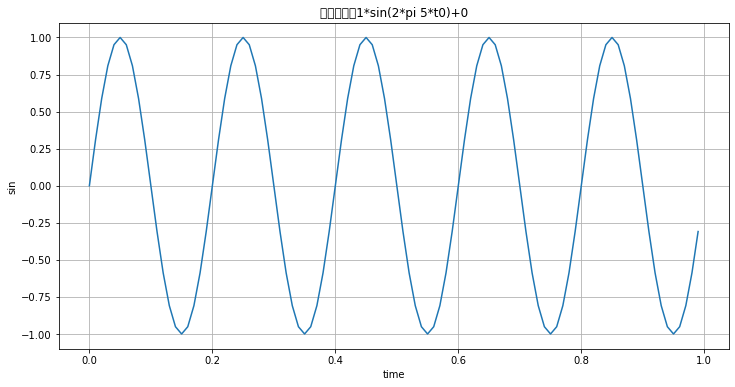

In [9]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정을 모듈화 해보자


In [10]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system()=="Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family="Arial Unicode MS")
elif platform.system()=="Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family = font_name)
else :
    print("Unknown system.. sorry~~~")
plt.rcParams["axes.unicode_minus"]=False

Overwriting ./set_matplotlib_hangul.py


Hangul OK in your Windows!!!


Text(0.5, 1.0, '한글')

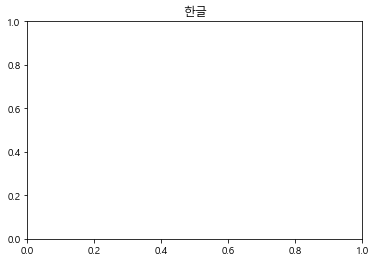

In [11]:
import set_matplotlib_hangul 
plt.title("한글")

---
## 095. fbprophet 기초

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #안에 그래프그리는... ## 대신 plt.show()?

UsageError: unrecognized arguments: #안에 그래프그리는... ## 대신 plt.show()?


#### 01

In [13]:
time = np.linspace(0,1,365*2) # 730등분
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01",periods=365*2,freq="D")
df = pd.DataFrame({
    "ds" : ds,
    "y":result
    })
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


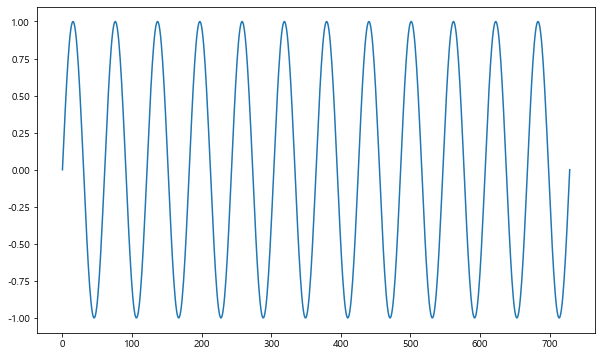

In [14]:
df["y"].plot(figsize=(10,6));

In [15]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True) #df로 앞으로 날짜가 어떻게 나타날지 예측
m.fit(df);

In [16]:
future = m.make_future_dataframe(periods=30) #30간의 데이터를 예측해봐
forecast = m.predict(future) #predict 예측한 결과값

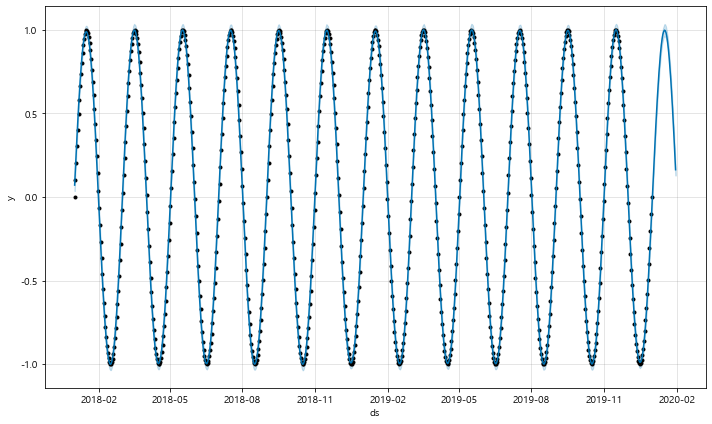

In [17]:
m.plot(forecast); # 검은 점이 없는 곳이 학습된 예측값 

#### 02 - 01을 살짝 변형

<AxesSubplot:>

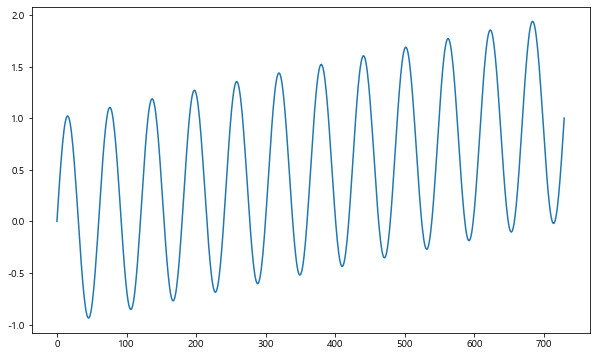

In [18]:
time = np.linspace(0,1,365*2) 
result = np.sin(2*np.pi*12*time) + time # + time
ds = pd.date_range("2018-01-01",periods=365*2,freq="D")
df = pd.DataFrame({
    "ds" : ds,
    "y":result
    })
df["y"].plot(figsize=(10,6))

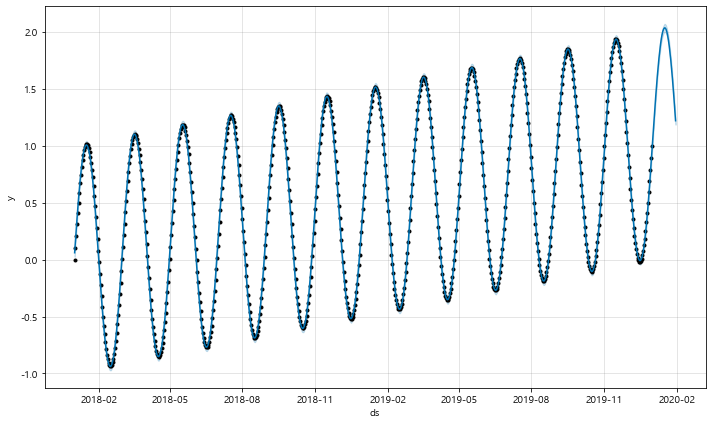

In [19]:
#이거를 예측합니다.
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df)#df를 넣어서학습
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)
m.plot(forcast);

## 03 - 02을 수정

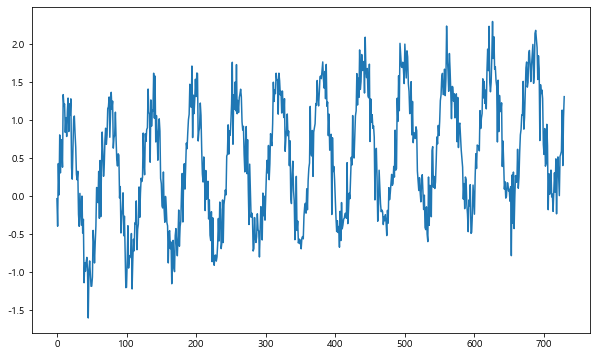

In [20]:
time = np.linspace(0,1,365*2) 
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4 # + time + np.random.randn(365*2)/4(노이즈)
ds = pd.date_range("2018-01-01",periods=365*2,freq="D")
df = pd.DataFrame({
    "ds" : ds,
    "y":result
    })
df["y"].plot(figsize=(10,6))
plt.show()

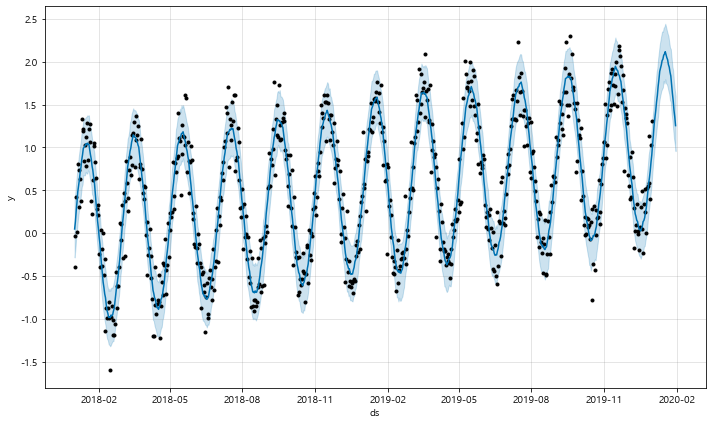

In [21]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df)#df를 넣어서학습
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)
m.plot(forcast);

## 097. 웹 유입량 데이터 분석
### (시계열 데이터 실전 이용해보기)
- https://pinkwink.kr/

In [22]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [23]:
pinkwink_web = pd.read_csv(
    "../../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names = ["date","hit"],
    index_col = 0
)
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [24]:
pinkwink_web = pinkwink_web[ pinkwink_web["hit"].notnull() ]
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [25]:
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


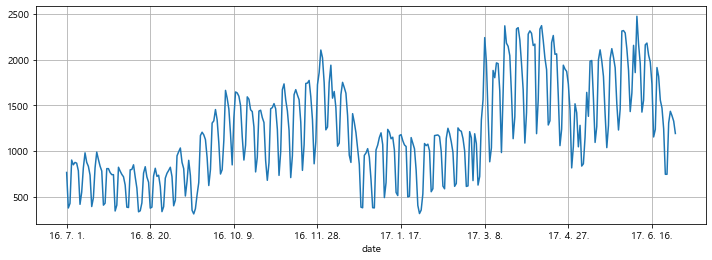

In [26]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12,4), grid=True); #날짜별 방문자 수

In [27]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0,len(pinkwink_web)) #0~364까지 365개
time #x축
traffic = pinkwink_web["hit"].values
traffic #y축
fx = np.linspace(0,time[-1],1000) #0부터 time[-1] = 364까지 1000등분해서 1차원 배열에 저장

In [28]:
# 에러를 계산할 함수
def error(f,x,y):
    return np.sqrt(np.mean( (f(x)-y) **2) ) #임의로 만든 함수

In [29]:
fp1 = np.polyfit(time, traffic, 1) #time과 traffic을 가지고 1차원함수를 만들어라
f1 = np.poly1d(fp1) #함수 f1

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [30]:
print(error(f1,time,traffic), error(f2,time,traffic), error(f3,time,traffic), error(f15,time,traffic))

430.85973081109626 430.6284101894695 429.53280466762925 330.4777304274343


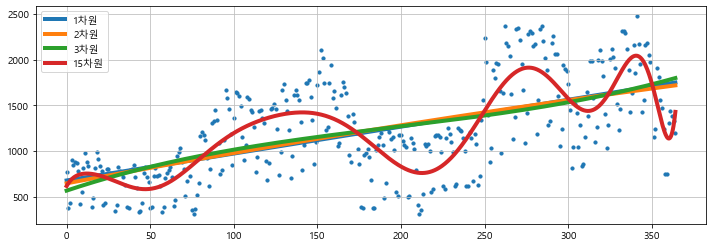

In [31]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
plt.plot(fx,f1(fx), lw=4, label = "1차원") #x축 ,y축, line width
plt.plot(fx,f2(fx), lw=4, label = "2차원")
plt.plot(fx,f3(fx), lw=4, label = "3차원")
plt.plot(fx,f15(fx), lw=4, label = "15차원")

plt.grid(True,linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show() #파랑색이 raw데이터 

In [32]:
df = pd.DataFrame({
    "ds" : pinkwink_web.index,
    "y" : pinkwink_web["hit"],
})
df.reset_index(inplace = True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
df.head()
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [33]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [34]:
# 60일에 해당하는 데이터를 예측
future = m.make_future_dataframe(periods=60) #학습된 데이터로 60일 데이터 새로만듬
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [35]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다.
forecast = m.predict(future)
forecast[ ["ds", "yhat","yhat_lower","yhat_upper"]].tail() #많은 컬럼중에... 4개만 선택

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,684.669796,1109.475316
421,2017-08-26,481.544412,253.296517,691.461140
422,2017-08-27,614.212001,389.145766,825.527717
423,2017-08-28,1166.966207,949.507863,1383.960395
424,2017-08-29,1203.000155,988.025152,1412.477571


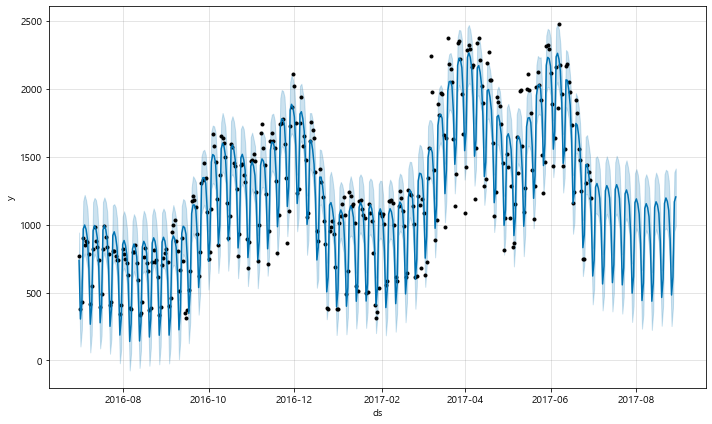

In [36]:
m.plot(forecast);

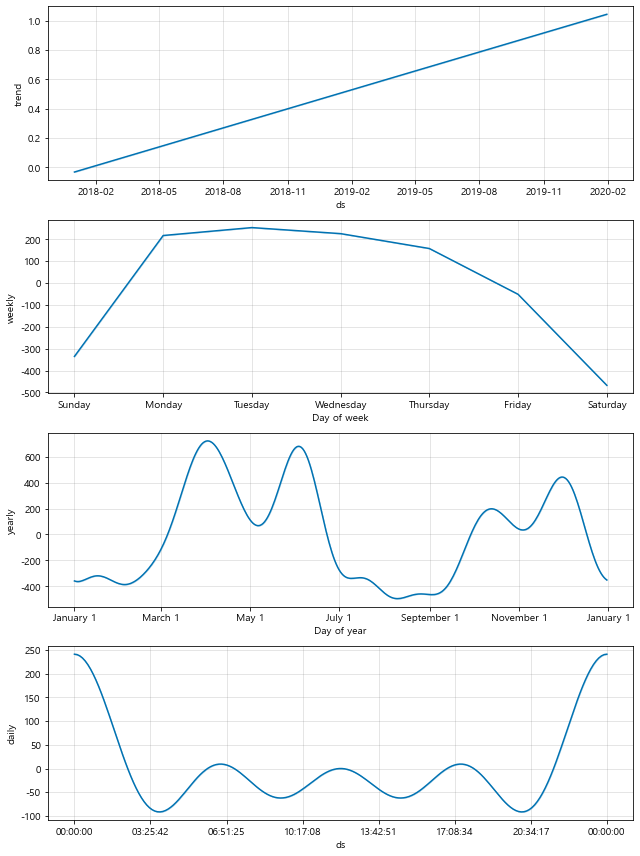

In [37]:
m.plot_components(forcast); #트렌드 분석

--- 
# 099. 주식데이터 분석

## 1. Yahoo finance
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [38]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1"
req = Request(url,headers={"User-agent":"Chrome"})
# user-agent를 chrome으로 설정하고 url요청해서 받은 결과물을 담아서
#page = urlopen(req) #
page = urlopen(req).read() #내용을 읽어옴
soup = BeautifulSoup(page,"html.parser")
table = soup.find("table",class_="W(100%) M(0)")

In [39]:
import pandas as pd
# read_html로 table가져온 후 보통 첫번째([0])데이터
df_raw = pd.read_html(str(table)) 
df_raw
df_raw = pd.read_html(str(table))[0] #[0]넣어줘야함
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 08, 2021",397500.00,397500.00,388000.00,388500.00,388500.00,542514
1,"Oct 07, 2021",380500.00,394000.00,378000.00,393500.00,393500.00,832068
2,"Oct 06, 2021",373000.00,383500.00,371500.00,373000.00,373000.00,826716
3,"Oct 05, 2021",378500.00,380000.00,370000.00,370500.00,370500.00,828794
4,"Oct 01, 2021",388500.00,389500.00,381500.00,382000.00,382000.00,402239


In [40]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 
## 맨 마지막 NaN 값이 있어서 제외하려고한다.
df_tmp = pd.DataFrame({
    "ds" : df_raw["Date"],
    "y" : df_raw["Close*"]
})
df_target = df_tmp[:-1] #마지막거 제외
#df_tmp.tail()
df_target.head()

,ds,y
0,"Oct 08, 2021",388500.00
1,"Oct 07, 2021",393500.00
2,"Oct 06, 2021",373000.00
3,"Oct 05, 2021",370500.00
4,"Oct 01, 2021",382000.00


In [41]:
# hardcopy한 후에 날짜를 fbprophet이 요구하는 형태(2021-10-08)로 변경 
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"],format="%b %d, %Y") #casting 
df.head()

,ds,y
0,2021-10-08,388500.00
1,2021-10-07,393500.00
2,2021-10-06,373000.00
3,2021-10-05,370500.00
4,2021-10-01,382000.00


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [43]:
# 데이터형 변환 object => float
df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [44]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [45]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future) # future데이터프레임을
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-03,435819.774712,424460.647892,447469.555763
126,2021-11-04,440183.547603,428211.117153,450730.632192
127,2021-11-05,443571.834845,432811.130938,454645.390272
128,2021-11-06,441912.178215,430592.178577,453197.294788
129,2021-11-07,444030.247793,433076.504074,455597.811434


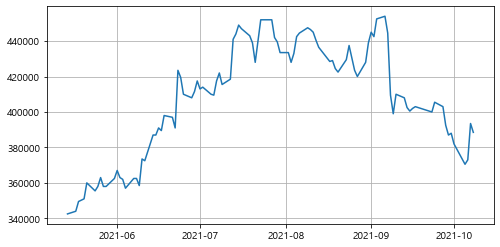

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df["ds"],df["y"],label="real")
plt.grid(True)
plt.show()

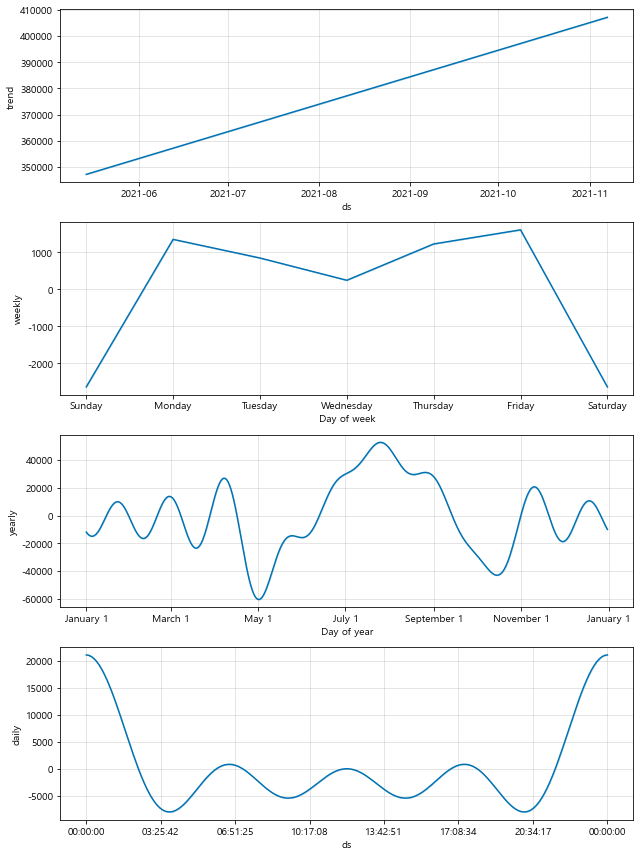

In [47]:
m.plot_components(forecast); #주제별로

## 2. KIA 주가 데이터
- 설치 
    - !pip install yfinance

In [48]:
# 내용 이해해보자...
# 기아 자동차의 종목코드(000270.KS)를 가지고 기간을 입력한다.
import yfinance as yf
from pandas_datareader import data
yf.pdr_override()

start_date = "2010-03-01"
end_date = "2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [51]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.662109,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.734375,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.197266,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.873047,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.603516,4326618


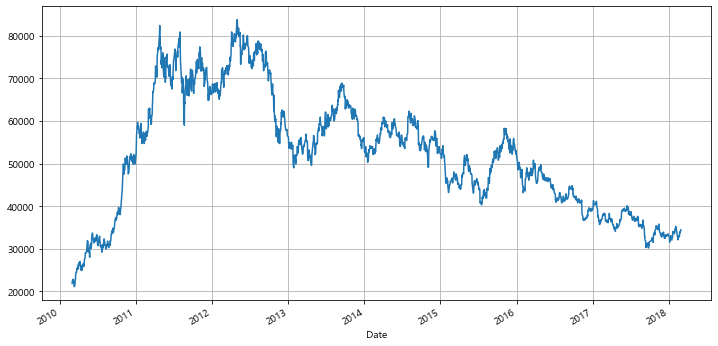

In [52]:
KIA["Close"].plot(figsize=(12,6), grid=True);

In [54]:
# 끝부분을 test로 쓰기 위해 잘라내자
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,33150.0,33400.0,32800.0,33050.0,30097.224609,773316
2017-11-27,32800.0,33050.0,32450.0,32750.0,29824.029297,1318245
2017-11-28,32650.0,33450.0,32450.0,32950.0,30006.160156,1350643
2017-11-29,33000.0,33500.0,32700.0,33350.0,30370.423828,884282
2017-11-30,33700.0,34250.0,33500.0,33650.0,30643.621094,2048876


In [58]:
# forecast를 위한 준비
df = pd.DataFrame({
    "ds" : KIA_trunc.index,
    "y" : KIA_trunc["Close"]
})
df.head()
df.reset_index(inplace=True)
del df["Date"]
df.head() # 이모양이 prophet에서 원하는 모양

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [59]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [60]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,26879.820301,22937.857902,31082.884113
2002,2018-02-25,26962.113329,22609.850059,31344.461190
2003,2018-02-26,27189.323268,22834.277602,31917.299629
2004,2018-02-27,27353.074108,22874.366115,31331.020105
2005,2018-02-28,27398.864477,23060.578821,31296.836507


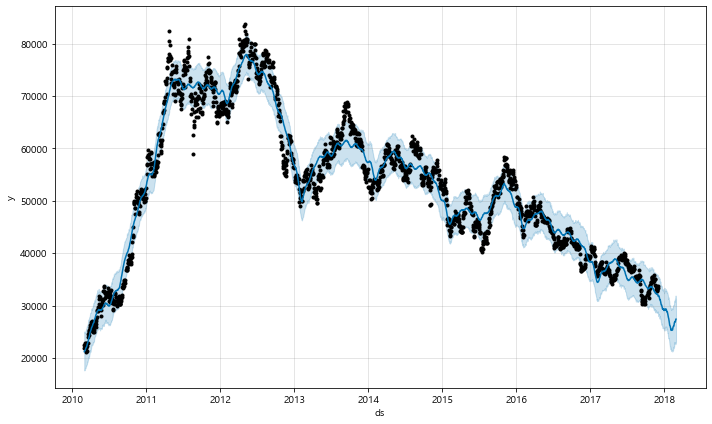

In [62]:
m.plot(forecast);

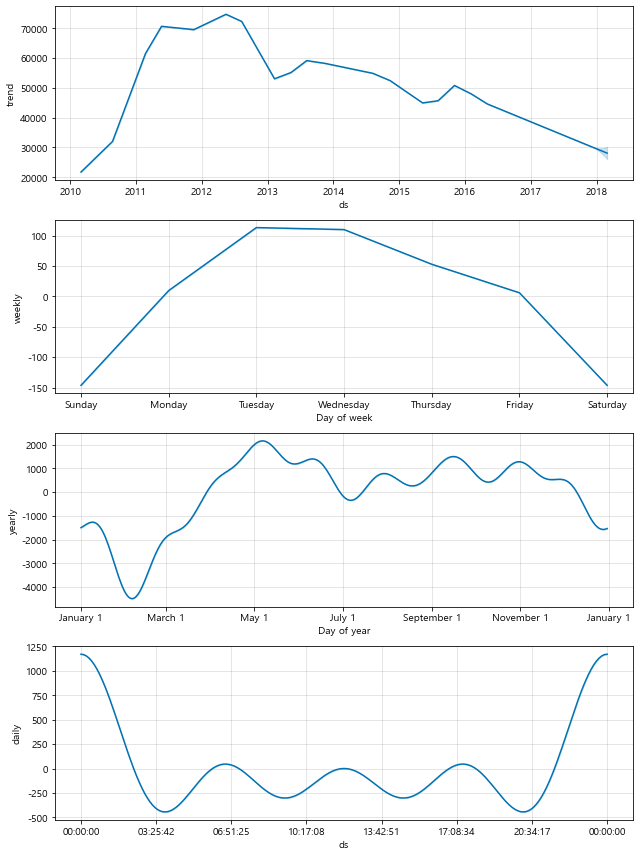

In [63]:
m.plot_components(forecast);

In [64]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

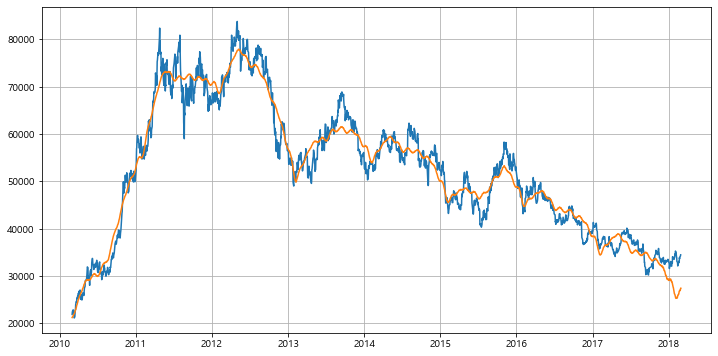

In [66]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA["Close"], label="real") #실제데이터
plt.plot(forecast["ds"],forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend() #label보이게
plt.show() 
# 파랑색 실제 데이터 
# 주황색 예측 데이터

## 3. 대한항공(003490) 

In [67]:
start_date = "2010-03-01"
end_date = "2018-02-28"
KoreaAir = data.get_data_yahoo("003490.KS", start_date,end_date)
KoreaAir.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-21,35350.0,35950.0,35150.0,35350.0,35167.996094,237279
2018-02-22,35050.0,35450.0,34800.0,35000.0,34819.800781,260174
2018-02-23,35200.0,35400.0,34550.0,35150.0,34969.027344,321125
2018-02-26,35300.0,35550.0,33600.0,33900.0,33725.460938,932870
2018-02-27,33900.0,34300.0,33650.0,33900.0,33725.460938,527398


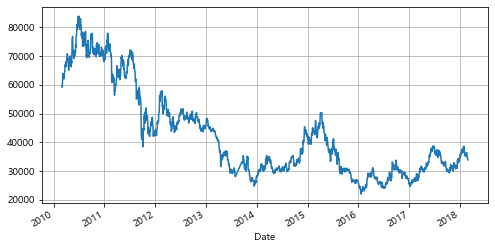

In [69]:
KoreaAir["Close"].plot(figsize=(8,4),grid=True);

In [70]:
# accuracy 데이터 분리
KoreaAir_trunc = KoreaAir[:"2017-11-30"]
KoreaAir_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,32900.0,33250.0,32300.0,32500.0,32168.935547,530941
2017-11-27,32600.0,32800.0,31800.0,31850.0,31525.556641,472095
2017-11-28,32050.0,32500.0,31550.0,31600.0,31278.103516,708754
2017-11-29,31850.0,32250.0,31050.0,31300.0,30981.160156,850385
2017-11-30,31800.0,32050.0,31350.0,31350.0,31030.650391,682573


In [77]:
# forecast를 위한 준비
df = pd.DataFrame({
    "ds": KoreaAir_trunc.index,
    "y" : KoreaAir_trunc["Close"]
})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [100]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [104]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
2948,2016-03-26,7.502607,7.212752,7.802234
2949,2016-03-27,7.509870,7.234939,7.785128
2950,2016-03-28,7.924752,7.640787,8.216529
2951,2016-03-29,7.990794,7.685241,8.249899
2952,2016-03-30,7.998123,7.697261,8.284362


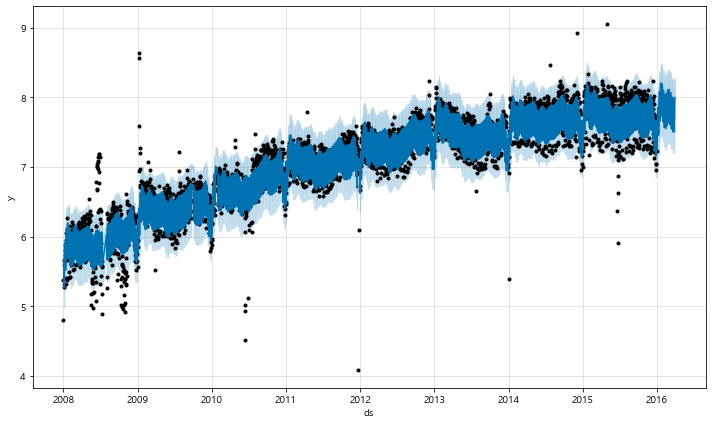

In [105]:
m.plot(forecast);

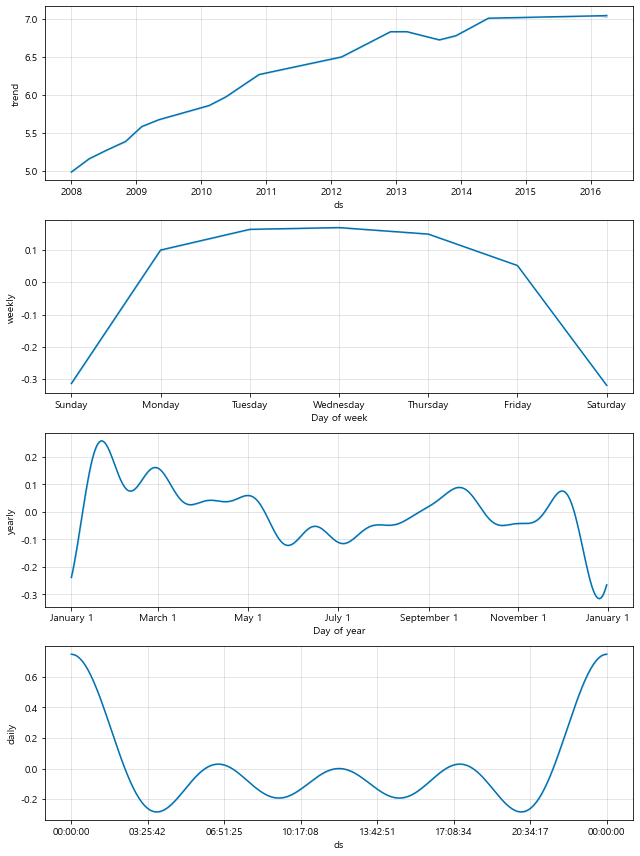

In [103]:
m.plot_components(forecast);

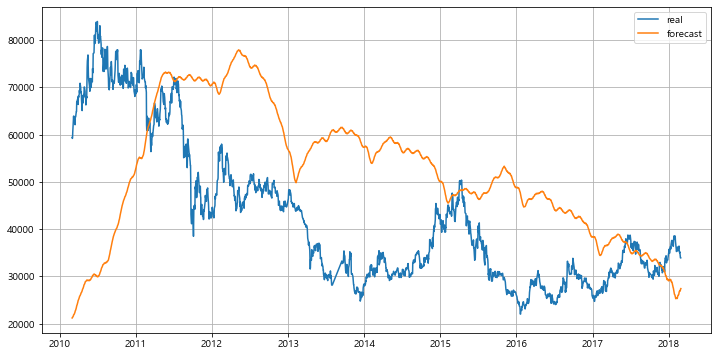

In [90]:
# 실제와 예측값 비교 그래프
plt.figure(figsize=(12,6))
plt.plot(KoreaAir.index, KoreaAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show() 
# 파랑색 실제
# 주황색 예측

#### 4. 조금 특이한 형태에 대한 forecast

<AxesSubplot:>

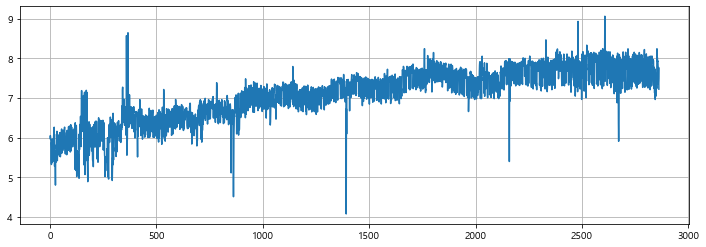

In [94]:
df = pd.read_csv("../../data/05_example_wp_R2.csv",index_col=0)
df
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast
df["y"].plot(figsize=(12,4),grid=True)

In [95]:
#컬럼추가
df["cap"] = 8.5
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


In [96]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df);

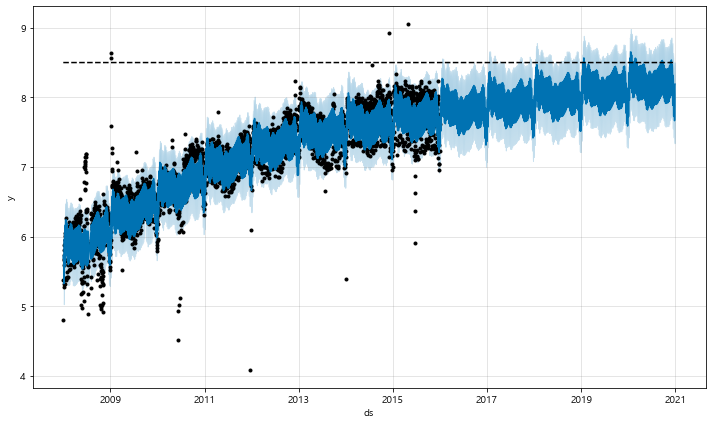

In [99]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5 
forecast = m.predict(future)
m.plot(forecast);

---
# 101. 비트코인 데이터 분석
- url = https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

%matplotlib inline

In [50]:
url = "https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv"  #730일간의 데이터
driver = webdriver.Chrome("../../driver/chromedriver")
driver.get(url)
time.sleep(10)

WebDriverException: Message: unknown error: cannot determine loading status
from disconnected: received Inspector.detached event
  (Session info: chrome=94.0.4606.71)


In [ ]:
# 스크롤
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script("return arguments[0].scrollIntoView();", variable)
#클릭
variable.click()

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html,"html.parser")
table = soup.find("table", class_="data")
#table

In [ ]:
driver.quit()

In [ ]:
df = pd.read_html(str(table)) #리스트 형태
df # 이상한 형태로 나옴
df[0]
bitcoin = df[0]
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2019-10-13 00:00:00,8303.43,8474.48,8132.91,8282.96,4445.28,37082713.92,8342.04
1,2019-10-14 00:00:00,8278.39,8416.67,8215.41,8362.99,4294.61,35705415.19,8314.01
2,2019-10-15 00:00:00,8353.33,8420.85,8086.00,8155.13,5044.66,41647353.51,8255.73
3,2019-10-16 00:00:00,8162.45,8179.10,7912.66,7995.89,8644.40,69316753.57,8018.69
4,2019-10-17 00:00:00,7995.73,8130.71,7936.71,8073.32,5395.89,43466038.76,8055.40


In [ ]:
bitcoin.to_csv("../../data/05_bitcoin_history.csv", sep=",")

In [ ]:
bitcoin = pd.read_csv("../../data/05_bitcoin_history.csv",index_col=0) #Unnameed:0 없애기
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
725,2021-10-07 00:00:00,55360.10,55360.32,53289.57,53787.60,2349.70,1.275100e+08,54266.46
726,2021-10-08 00:00:00,53816.16,56168.00,53623.02,53957.21,2217.76,1.213333e+08,54709.97
727,2021-10-09 00:00:00,53952.82,55512.05,53674.69,54976.92,1061.02,5.821879e+07,54870.42
728,2021-10-10 00:00:00,54984.49,56561.00,51000.00,54714.95,1735.42,9.565476e+07,55119.02
729,2021-10-11 00:00:00,54657.00,57092.62,54462.45,56736.10,667.70,3.761848e+07,56340.30


In [ ]:
# 분석하고 싶은 항목(Close)만 가지고, Prophet 적용
df = pd.DataFrame({
    "ds":bitcoin["Timestamp"],
    "y" : bitcoin["Close"]
})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

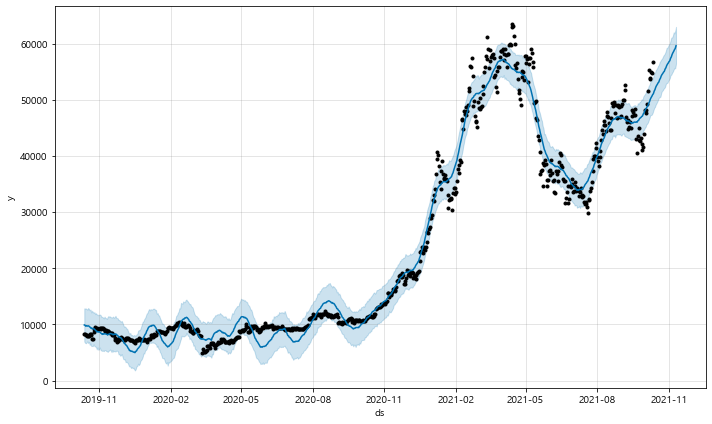

In [ ]:
# 향후 30일 간의 데이터 예측
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)
m.plot(forcast);

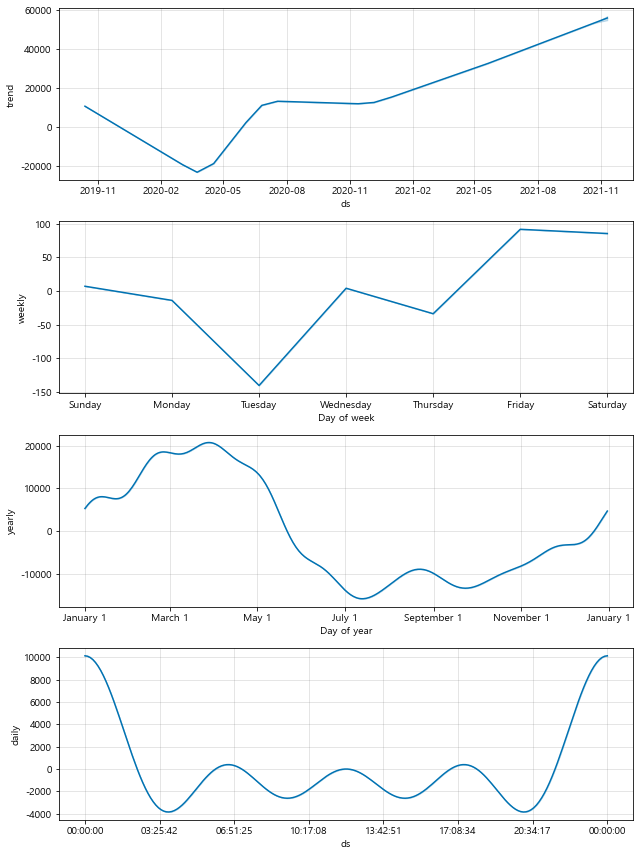

In [ ]:
#트렌드 확인
m.plot_components(forcast);